<a href="https://colab.research.google.com/github/wajdalturki/Wajdalturki/blob/main/Day9ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# load data
df = pd.read_csv('/seattleWeather_1948-2017.csv').dropna()
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
fig = px.pie(df, df['RAIN'],color_discrete_sequence=px.colors.sequential.RdBu)
fig
fig.update_layout(title_text='Rain or Not?')

In [ ]:
# X to all features
X = df.loc[:,df.columns!='RAIN']
# y to our target Rain
y = df.RAIN

In [ ]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
df.value_counts()

DATE        PRCP  TMAX  TMIN  RAIN 
2017-12-14  0.00  50    36    False    1
1971-04-17  0.15  56    43    True     1
1971-04-19  0.00  60    40    False    1
1971-04-20  0.08  51    44    True     1
1971-04-21  0.00  54    41    False    1
                                      ..
1994-08-21  0.00  72    60    False    1
1994-08-22  0.00  68    58    False    1
1994-08-23  0.00  75    59    False    1
1994-08-24  0.00  75    54    False    1
1948-01-01  0.47  51    42    True     1
Length: 25548, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
df.shape

(25548, 5)

In [ ]:
df.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [ ]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [ ]:
corr = df.corr()
corr

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860675
TMIN,-0.064365,0.860675,1.000000


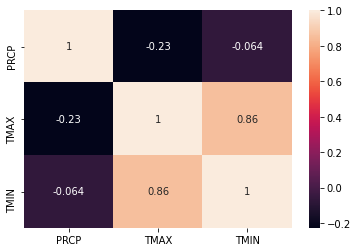

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
StandardScaler_ = StandardScaler()

X_train = StandardScaler_.fit_transform(X_train)
X_test = StandardScaler_.transform(X_test)

In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2
count,7.664000e+03,7.664000e+03,7.664000e+03
mean,8.938715e-17,2.226566e-16,-1.688005e-16
std,1.000065e+00,1.000065e+00,1.000065e+00
min,-4.578495e-01,-1.052701e-01,-1.585090e+00
25%,-4.578495e-01,-1.052701e-01,-1.006373e+00
50%,-4.578495e-01,-1.052701e-01,-1.382984e-01
75%,2.608333e-04,-1.052701e-01,1.019135e+00
max,1.324381e+01,9.499373e+00,1.597851e+00


In [ ]:
 #convert date from object to 'datetime' data type
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.dtypes

DATE    datetime64[ns]
PRCP           float64
TMAX             int64
TMIN             int64
RAIN            object
dtype: object

In [ ]:
df['YEAR']=df['DATE'].map(lambda x: x.year)
df['MONTH']=df['DATE'].map(lambda x: x.month)
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH
0,1948-01-01,0.47,51,42,True,1948,1
1,1948-01-02,0.59,45,36,True,1948,1
2,1948-01-03,0.42,45,35,True,1948,1
3,1948-01-04,0.31,45,34,True,1948,1
4,1948-01-05,0.17,45,32,True,1948,1


In [ ]:
#convert RAIN to numeric 
#true/false
#Rain True=1 /Not Rain=0 

df['RAIN'] = df['RAIN'].apply(lambda x: 1 if x == True else 0)
df.head(15)

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH
0,1948-01-01,0.47,51,42,1,1948,1
1,1948-01-02,0.59,45,36,1,1948,1
2,1948-01-03,0.42,45,35,1,1948,1
3,1948-01-04,0.31,45,34,1,1948,1
4,1948-01-05,0.17,45,32,1,1948,1
5,1948-01-06,0.44,48,39,1,1948,1
6,1948-01-07,0.41,50,40,1,1948,1
7,1948-01-08,0.04,48,35,1,1948,1
8,1948-01-09,0.12,50,31,1,1948,1
9,1948-01-10,0.74,43,34,1,1948,1


## **LOGISTIC REGRESSION**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['DATE', 'TMAX',	'TMIN', 'RAIN'],axis=1), df['RAIN'], test_size=0.30)

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df.head(5)

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH
0,1948-01-01,0.47,51,42,1,1948,1
1,1948-01-02,0.59,45,36,1,1948,1
2,1948-01-03,0.42,45,35,1,1948,1
3,1948-01-04,0.31,45,34,1,1948,1
4,1948-01-05,0.17,45,32,1,1948,1


In [ ]:
df.tail(5)

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH
25546,2017-12-10,0.0,49,34,0,2017,12
25547,2017-12-11,0.0,49,29,0,2017,12
25548,2017-12-12,0.0,46,32,0,2017,12
25549,2017-12-13,0.0,48,34,0,2017,12
25550,2017-12-14,0.0,50,36,0,2017,12


##**prediction model**

In [ ]:
prediction_ = log.predict(X_test)
print (prediction_)

[0 1 0 ... 0 0 1]


In [ ]:
print("accuracy score:" ,'\n', accuracy_score(y_test,prediction_))

accuracy score: 
 0.910371819960861


In [ ]:
print("Confusion_matrix:", '\n', confusion_matrix(y_test,prediction_))


Confusion_matrix: 
 [[4389    0]
 [ 687 2589]]


In [ ]:
print("Classification report: ",'\n', classification_report(y_test,prediction_))

Classification report:  
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      4389
           1       1.00      0.79      0.88      3276

    accuracy                           0.91      7665
   macro avg       0.93      0.90      0.91      7665
weighted avg       0.92      0.91      0.91      7665



In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#log.predict(X_test[0:50])

## **Choose Target**

In [ ]:
# set X to all features
X = df.loc[:,df.columns!='YEAR']
# set y to target
y = df.YEAR

In [ ]:
#target is: " YEAR = 2017 "
#If year = 2017 --> set 1 (true) 
#else set 0 (false)

df['YEAR'] = df['YEAR'].apply(lambda x: 1 if x == 2017 else 0 )
df.head(5)

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH
0,1948-01-01,0.47,51,42,1,0,1
1,1948-01-02,0.59,45,36,1,0,1
2,1948-01-03,0.42,45,35,1,0,1
3,1948-01-04,0.31,45,34,1,0,1
4,1948-01-05,0.17,45,32,1,0,1


In [ ]:
df.tail(10)

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH
25541,2017-12-05,0.0,45,33,0,1,12
25542,2017-12-06,0.0,52,36,0,1,12
25543,2017-12-07,0.0,52,34,0,1,12
25544,2017-12-08,0.0,43,29,0,1,12
25545,2017-12-09,0.0,44,29,0,1,12
25546,2017-12-10,0.0,49,34,0,1,12
25547,2017-12-11,0.0,49,29,0,1,12
25548,2017-12-12,0.0,46,32,0,1,12
25549,2017-12-13,0.0,48,34,0,1,12
25550,2017-12-14,0.0,50,36,0,1,12


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['DATE', 'TMAX',	'TMIN', 'RAIN'],axis=1), df['RAIN'], test_size=0.70)

In [ ]:
log2 = LogisticRegression()
log2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##**prediction model**

In [ ]:
prediction_ = log.predict(X_test)
print (prediction_)

[1 1 0 ... 0 1 1]


In [ ]:
print("accuracy score:" ,'\n', accuracy_score(y_test,prediction_))

accuracy score: 
 0.9658912994855737


In [ ]:
print("Confusion_matrix:", '\n', confusion_matrix(y_test,prediction_))

Confusion_matrix: 
 [[9635  610]
 [   0 7639]]


In [ ]:
print("Classification report: ",'\n', classification_report(y_test,prediction_))

Classification report:  
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10245
           1       0.93      1.00      0.96      7639

    accuracy                           0.97     17884
   macro avg       0.96      0.97      0.97     17884
weighted avg       0.97      0.97      0.97     17884

